In [1]:
import numpy as np
import scipy
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def loadLinks(path):
    d = {}
    with open(path) as f:
        for l in f:
            w = l.split()
            d[int(w[0])] = [int(i) for i in w[1:]]
    return d

In [3]:
data = np.loadtxt("./recodata/u.data", int)[:,:3]
links = nx.from_dict_of_lists(loadLinks("./recodata/u.links"),create_using=nx.DiGraph())
du, dv, _ = data.max(0)

In [ ]:
def colFil(r, u, v, ite = 1, alpha = 0.001, eps = 1e-3, verbose = False):
    '''r matrice sparse de la forme rowInd colInd data
    u : rowLen(r) * n
    v : colLen(r) * m'''
    for i in range(ite):
        if i%(ite//10) == 0: 
            print("iter :", i)
            if verbose :
                print("u", u.mean(0))
                print("v", v.mean(0))
        for ui, vi, d in r:
            ui -= 1
            vi -= 1
            dist1 = d - u[ui].dot(v[vi])
            u[ui] += eps * 2 *(dist1 * v[vi] + alpha * u[ui])
            v[vi] += eps * 2 *(dist1 * u[ui] + alpha * v[vi])
            if verbose : print("u", u[ui])
            if verbose : print("v", v[vi])
        lossHisto.append(dist1*dist1)

In [ ]:
u = np.random.rand(du, 10)
v = np.random.rand(dv, 10)
lossHisto = []
#colFil(data, u, v, 300)
colFil(data, u, v, 300, verbose = True)

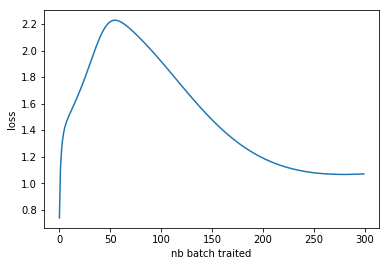

In [11]:
plt.plot(lossHisto)
plt.ylabel('loss')
plt.xlabel('nb batch traited')
plt.show()

In [12]:
r2 = u.dot(v.T)
i,j,d = data[50]
print(r2[i,j], d)

3.64942239738 4


Faire pareil que colFil mais avec une contrainte suplémentaire : minimiser les distance entre certain vecteur de U et une autre matrice Z avec les lien entre l'utilisateur i et j (potentiellement dirigé) t. q. (Ui-Zj)^2 -> 0 

In [22]:
def colFilRez(r, l, u, v, ite = 1, alpha = 0.001, beta = 0.1, eps = 1e-3, verbose = False):
    '''r matrice sparse de la forme rowInd colInd data
    u : rowLen(r) * n
    v : colLen(r) * m'''
    for i in range(ite):
        if i%(ite//10) == 0:
        #if True :
            print("iter :", i)
            if verbose :
                print("u", u.mean(0))
                print("v", v.mean(0))
        for ui, vi, d in r:
            ui -= 1
            vi -= 1
            dist1 = d - u[ui].dot(v[vi])
            v[vi] += eps * 2 *(dist1 * u[ui] + alpha * v[vi])
            if l.has_node(ui) and l.out_degree[ui] != 0:
                for zi in l.neighbors(ui):
                    zi -= 1
                    u[ui] += eps * 2 *(dist1 * v[vi] + alpha * u[ui] + beta * (u[zi] - u[ui]))
            else :
                u[ui] += eps * 2 *(dist1 * v[vi] + alpha * u[ui])
        lossHisto.append(dist1*dist1)

In [26]:
u2 = np.random.rand(du, 10)
v2 = np.random.rand(dv, 10)
lossHisto = []
colFilRez(data, links, u2, v2, 100)

iter : 0
u [ 0.50687497  0.49329492  0.50436624  0.5042371   0.4916564   0.50475769
  0.49514683  0.49927328  0.50673865  0.50000272]
v [ 0.49478389  0.49744434  0.4824159   0.50180377  0.48690032  0.48490815
  0.51809736  0.50040603  0.48971862  0.48914875]
iter : 10
u [ 0.65295898  0.69623735  0.64786696  0.64064362  0.6284597   0.6467758
  0.64880169  0.69794265  0.66639036  0.67466182]
v [ 0.50277686  0.50589491  0.49138824  0.51011533  0.49444951  0.49328995
  0.52463002  0.5078918   0.4973559   0.4977779 ]
iter : 20
u [ 0.66911496  0.72985265  0.65265386  0.65262893  0.63628808  0.67153865
  0.64810042  0.72277054  0.67073022  0.68522617]
v [ 0.49368617  0.4958631   0.48234932  0.50076109  0.48411548  0.48381862
  0.51336735  0.49641672  0.48637309  0.48838093]
iter : 30
u [ 0.68612148  0.76314503  0.6554945   0.66467314  0.64377137  0.69795715
  0.65004608  0.74452172  0.673898    0.68926394]
v [ 0.48579202  0.48607929  0.47409395  0.4919234   0.47385356  0.47469629
  0.50225919

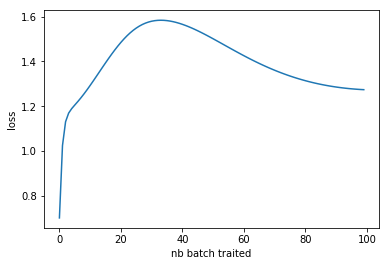

In [27]:
plt.plot(lossHisto)
plt.ylabel('loss')
plt.xlabel('nb batch traited')
plt.show()